In [58]:
library('igraph')
library('Matrix')
library('pracma')

In [59]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [60]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        count_node_freq[v]<- count_node_freq[v]+1
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    return(count_node_freq)
}

In [61]:
g<-barabasi.game(n=1000, m = 4, directed=TRUE)
summary(g)

IGRAPH 4349048 D--- 1000 3990 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)


In [63]:
# VERSION 1: Finding page_rank vector
x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    final_count_node_freq <- final_count_node_freq + random_walk(g,t,start,tm)
}
page_rank_vector <- final_count_node_freq/sum(final_count_node_freq)

In [65]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.15){ # Teleportation
            count_node_freq[v] <- count_node_freq[v]+1
            v <- sample(1:1000, 1, replace=T, prob=page_rank_vector)
        }
        else{ # Transition Matrix
            count_node_freq[v] <- count_node_freq[v]+1
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
        }
    }
    return(count_node_freq)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    final_count_node_freq <- final_count_node_freq + random_walk(g,t,start,tm)
}

final_count_node_prob <- final_count_node_freq/sum(final_count_node_freq)
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
0.992542 0.001126 0.00073 0.000562 0.000216 0.000112 5.6e-05 5.4e-05 7.2e-05 0.000318 6.2e-05 3e-05 3.8e-05 0.000142 9.2e-05 2e-06 2.2e-05 5e-05 6e-06 1e-04 2.8e-05 1.4e-05 4.4e-05 2.2e-05 8.4e-05 1e-05 2e-06 3.2e-05 2e-05 3.8e-05 2.8e-05 8e-06 4e-06 1e-05 2e-06 2e-06 2.6e-05 1.8e-05 3.6e-05 2e-06 2e-06 1.4e-05 6e-06 1.2e-05 1e-05 0 6e-06 1.6e-05 8e-06 2e-06 2.6e-05 5.6e-05 1.2e-05 4e-06 2e-06 8e-06 1.4e-05 6e-06 1.8e-05 0 1.8e-05 4e-05 6e-06 1.4e-05 4e-06 4e-06 1.6e-05 4e-06 4e-05 2.4e-05 1e-05 2e-06 0 2e-06 0 2e-06 2e-06 2e-06 6e-06 2e-06 2e-06 3.4e-05 1e-05 4e-06 2e-06 6e-06 2e-06 8e-06 1.4e-05 2e-06 6e-06 4e-06 4e-06 4e-06 6e-06 6e-06 2e-06 2e-05 0 4e-06 2e-06 1.2e-05 4e-06 6e-06 0 4e-06 4e-06 6e-06 1.4e-05 4e-06 8e-06 8e-06 2e-06 4e-06 1.2e-05 1.8e-05 4e-06 1e-05 6e-06 4e-06 2e-06 4e-06 8e-06 8e-06 0 6e-06 1e-05 8e-06 2e-06 4e-06 1.6e-05 4e-06 0 1.4e-05 0 2e-06 1.4e-05 6e-06 1.2e-05 4e-06 4e-06 6e-06 4e-06 1e-05 2e-06 1.2e-05 2e-06 0 1.2e-

Correlation between degree and visit probability:  0.4599239

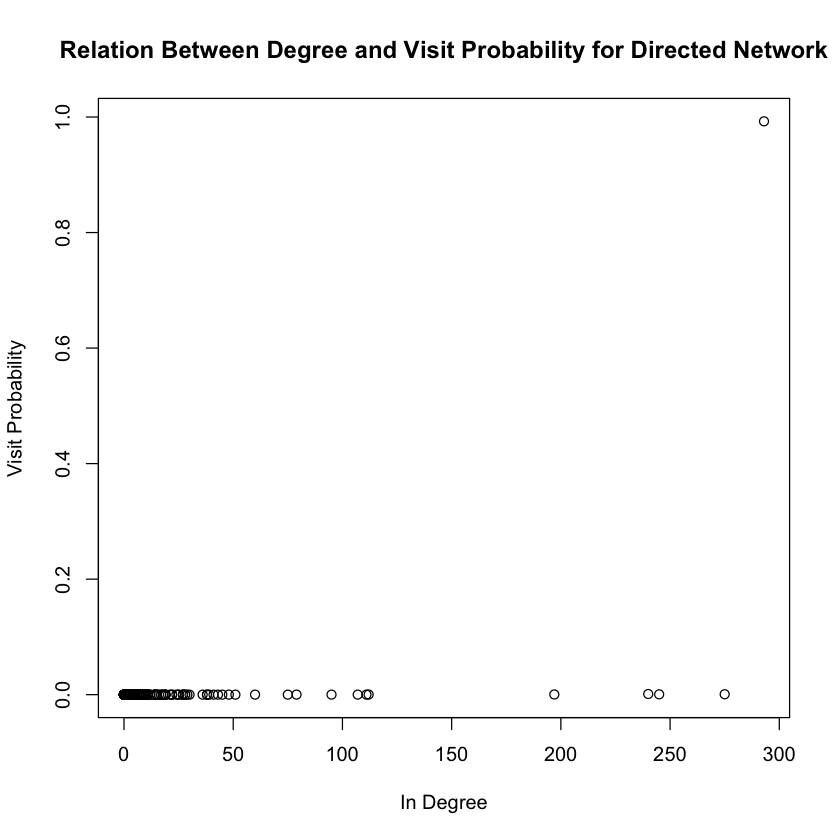

In [66]:
network_degree = degree(g, mode="in")
visit_probability = final_count_node_prob
relationship = cor(network_degree, visit_probability)
cat("Correlation between degree and visit probability: ", relationship)

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  # order by degree
plot(plot_data[1,], plot_data[2,], xlab = "In Degree", ylab = "Visit Probability", main = "Relation Between Degree and Visit Probability for Directed Network")

In [31]:
# Part(b)
med <- median(final_count_node_prob)
node_1 <- which(final_count_node_prob == med)[1]
node_2 <- which(final_count_node_prob == med)[2]
vec <- numeric(1000)
vec[node_1] <- 0.5
vec[node_2] <- 0.5

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.15){ # Teleportation
            count_node_freq[v] <- count_node_freq[v]+1
            v <- sample(1:1000, 1, replace=T, prob=vec)
        }
        else{ # Transition Matrix
            count_node_freq[v] <- count_node_freq[v]+1
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
        }
    }
    return(count_node_freq)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    final_count_node_freq <- final_count_node_freq + random_walk(g,t,start,tm)
}

final_count_node_prob <- final_count_node_freq/sum(final_count_node_freq)
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
0.684366 0.035466 0.035226 0.030472 0.015842 0.015226 0.01882 1.8e-05 7.2e-05 3e-05 0.00011 0.00328 6e-06 8.2e-05 0.01532 1.6e-05 8.8e-05 6e-06 0 1.8e-05 1e-05 2e-06 2.6e-05 0.0717 5.8e-05 1.2e-05 4.6e-05 0.07076 2e-06 2.4e-05 8e-06 2e-05 4e-06 8e-06 2e-06 6e-06 2e-06 6e-06 2.4e-05 4e-06 1.4e-05 8e-06 2e-06 6e-06 4e-06 2e-06 4e-06 2e-06 3.6e-05 4e-06 2e-06 1.2e-05 8e-06 6e-06 4e-06 4e-06 1.8e-05 2.6e-05 6e-06 1.6e-05 2.2e-05 6e-06 0 4e-06 1.6e-05 6e-06 1e-05 1.4e-05 2e-06 1e-05 0 0 1.4e-05 6e-06 1.6e-05 6e-06 2e-06 0 8e-06 1e-05 4e-06 2e-06 2e-06 8e-06 8e-06 4e-06 4e-06 2e-06 4e-06 0 6e-06 1.2e-05 8e-06 8e-06 2e-06 2e-06 2e-06 2e-06 4e-06 0 8e-06 2e-06 4e-06 6e-06 2e-06 6e-06 1.8e-05 6e-06 8e-06 6e-06 2e-06 1e-05 1.2e-05 2e-06 4e-06 4e-06 1e-05 6e-06 1e-05 1.4e-05 2e-06 1e-05 6e-06 2e-06 0 4e-06 2e-06 1.2e-05 1.6e-05 1.6e-05 2e-06 0 6e-06 4e-06 4e-06 0 6e-06 0 4e-06 1e-05 8e-06 1.2e-05 2e-05 4e-06 0 2e-06 4e-06 0 2e-06 4e-06 0 0 8e-06 0 4e-06 2

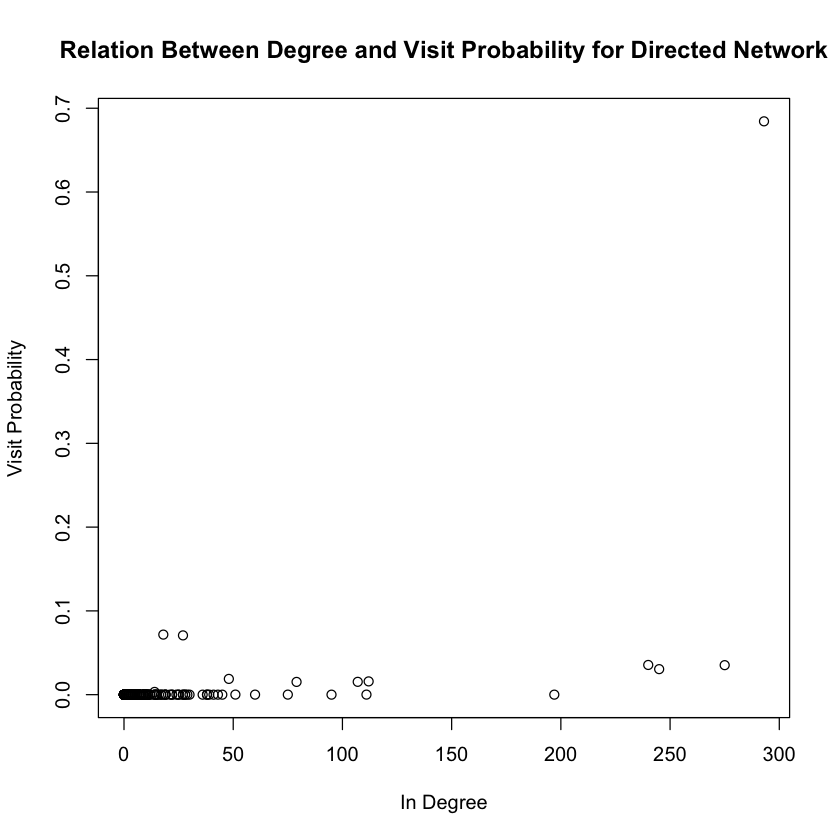

In [72]:
network_degree = degree(g, mode="in")
visit_probability = final_count_node_prob
relationship = cor(network_degree, visit_probability)

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  # order by degree
plot(plot_data[1,], plot_data[2,], xlab = "In Degree", ylab = "Visit Probability", main = "Relation Between Degree and Visit Probability for Directed Network")

In [15]:
# VERSION 2: Finding page_rank vector
random_walk_v2 = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        count_node_freq[v] <- count_node_freq[v]+1
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    return(v)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x){
     node <- random_walk_v2(g,t,start,tm)
    final_count_node_freq[node] <- final_count_node_freq[node]+1
}
page_rank_vector <- final_count_node_freq/sum(final_count_node_freq)

In [16]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.15){ # Teleportation
            count_node_freq[v] <- count_node_freq[v]+1
            v <- sample(1:1000, 1, replace=T, prob=page_rank_vector)
        }
        else{ # Transition Matrix
            count_node_freq[v] <- count_node_freq[v]+1
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
        }
    }
    return(count_node_freq)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    final_count_node_freq <- final_count_node_freq + random_walk(g,t,start,tm)
}

final_count_node_prob <- final_count_node_freq/sum(final_count_node_freq)
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
0.994462 0.000706 0.000498 0.000328 0.000182 0.000188 4.6e-05 2.4e-05 3.8e-05 0.000138 2.2e-05 2.4e-05 1.2e-05 5.2e-05 4.6e-05 1.4e-05 2e-06 1.6e-05 3e-05 2.2e-05 1.2e-05 2e-06 4.2e-05 2.8e-05 0 8e-06 1e-05 2.4e-05 3.8e-05 6.4e-05 4e-06 1e-05 2.2e-05 8e-06 6e-06 2e-05 2.4e-05 4e-06 1.8e-05 0 4e-06 1.2e-05 1.6e-05 8e-06 8e-06 8e-06 4e-06 2e-06 4e-06 1.2e-05 8e-06 2.8e-05 8e-06 0 3.2e-05 6e-06 4.2e-05 6e-06 4e-06 2e-06 1.2e-05 1.2e-05 1.2e-05 2e-06 0 0 1.4e-05 0 4e-06 1.8e-05 2e-06 1.2e-05 1.2e-05 8e-06 2e-06 2e-06 6e-06 6e-06 4e-06 1.6e-05 4e-06 1.4e-05 1.4e-05 2.2e-05 4e-06 2e-06 6e-06 4e-06 1.2e-05 6e-06 6e-06 2e-06 6e-06 2e-06 6e-06 2e-06 4e-06 8e-06 4e-06 1e-05 8e-06 4e-06 6e-06 2e-06 6e-06 2e-06 2e-06 0 4e-06 2e-06 2e-06 4e-06 0 2e-06 4e-06 2e-06 2e-06 1e-05 4e-06 1.2e-05 0 2e-06 0 1.2e-05 6e-06 2e-06 2e-06 1.6e-05 0 1.4e-05 6e-06 6e-06 4e-06 2e-06 2e-06 6e-06 8e-06 0 1e-05 4e-06 8e-06 1e-05 1e-05 0 8e-06 2e-06 2e-06 2e-06 4e-06 4e-06 6e-06

Correlation between degree and visit probability:  0.4406764

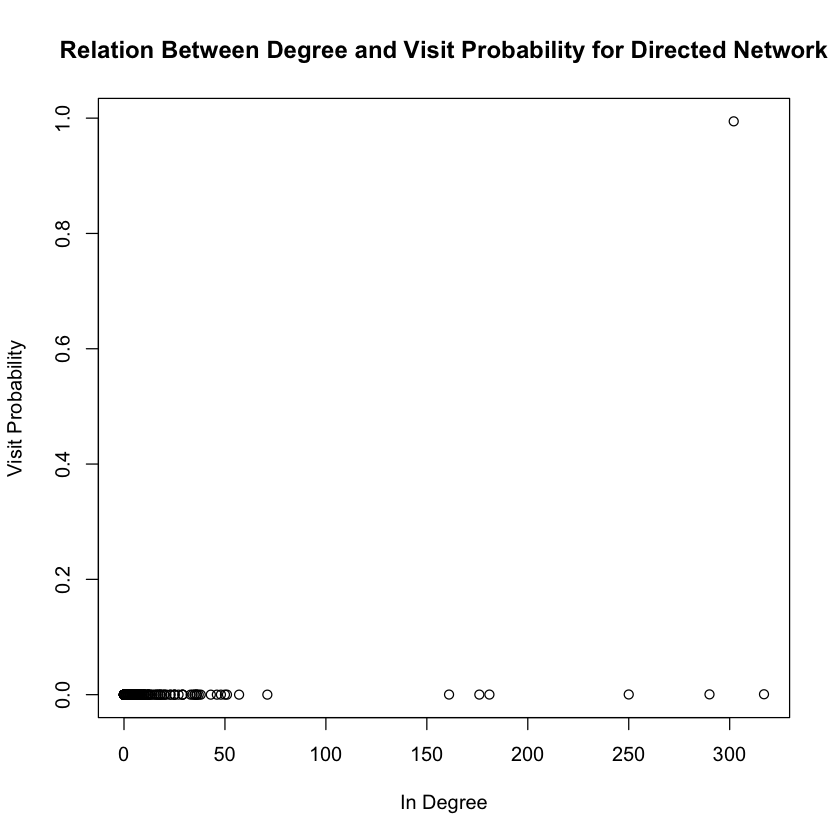

In [17]:
network_degree = degree(g, mode="in")
visit_probability = final_count_node_prob
relationship = cor(network_degree, visit_probability)
cat("Correlation between degree and visit probability: ", relationship)

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  # order by degree
plot(plot_data[1,], plot_data[2,], xlab = "In Degree", ylab = "Visit Probability", main = "Relation Between Degree and Visit Probability for Directed Network")

In [13]:
# VERSION 2: Part(b)
med <- median(final_count_node_prob)
node_1 <- which(final_count_node_prob == med)[1]
node_2 <- which(final_count_node_prob == med)[2]
vec <- numeric(1000)
vec[node_1] <- 0.5
vec[node_2] <- 0.5

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.15){ # Teleportation
            count_node_freq[v] <- count_node_freq[v]+1
            v <- sample(1:1000, 1, replace=T, prob=vec)
        }
        else{ # Transition Matrix
            count_node_freq[v] <- count_node_freq[v]+1
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
        }
    }
    return(v)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    node <- random_walk_v2(g,t,start,tm)
    final_count_node_freq[node] <- final_count_node_freq[node]+1
}

final_count_node_prob <- final_count_node_freq/sum(final_count_node_freq)
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 